In [17]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

In [18]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [19]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [20]:
y = df['Role_encoded']

In [21]:
X

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,4.000000,4.000000,4.000000,4.000000,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,4.000000,0.340535
1,5.000000,4.000000,4.000000,4.000000,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,4.250000,0.318385
2,1.000000,4.000000,4.000000,4.000000,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,3.250000,0.355388
3,0.000000,4.000000,4.000000,4.000000,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,3.000000,0.353118
4,3.000000,4.000000,4.000000,4.000000,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,3.750000,0.304697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.636043,0.137336,0.226302,0.056456,0.704709,0.480178,0.558140,0.238608,0.800011,0.780420,0.889618,0.230480,0.655361,0.149937,0.264034,0.548746
4112,0.192270,0.135045,0.644441,0.782071,0.879181,0.726732,0.715623,0.976057,0.972935,0.027870,0.402814,0.862264,0.628395,0.586368,0.438457,0.677824
4113,0.554620,0.724794,0.255892,0.122183,0.159705,0.963999,0.414078,0.097954,0.402532,0.959647,0.816209,0.398565,0.441053,0.072179,0.414373,0.472592
4114,0.465681,0.103231,0.229899,0.595242,0.621454,0.010347,0.574015,0.435590,0.852310,0.640508,0.716231,0.458104,0.368780,0.516576,0.348513,0.519392


In [22]:
y

0        6
1        6
2        6
3        6
4        6
        ..
4111    12
4112     7
4113    13
4114     8
4115     9
Name: Role_encoded, Length: 4116, dtype: int64

In [23]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
X_scaled

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,0.666667,0.666667,0.666667,0.666667,0.716175,0.480310,0.470353,0.039195,0.743468,0.085414,0.339526,0.089076,0.230310,0.208745,0.761905,0.275382
1,0.833333,0.666667,0.666667,0.666667,0.618465,0.452624,0.376950,0.089797,0.673265,0.069821,0.353436,0.102451,0.247233,0.196407,0.809524,0.239215
2,0.166667,0.666667,0.666667,0.666667,0.815976,0.461397,0.347072,0.138287,0.631317,0.093798,0.374896,0.133504,0.287078,0.268101,0.619048,0.299636
3,0.000000,0.666667,0.666667,0.666667,0.608710,0.521567,0.403155,0.114607,0.696058,0.121356,0.338648,0.159821,0.306398,0.258183,0.571429,0.295929
4,0.500000,0.666667,0.666667,0.666667,0.783087,0.319139,0.239546,0.050586,0.619972,0.063925,0.311630,0.145777,0.302811,0.207285,0.714286,0.216865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.106007,0.022889,0.037717,0.009409,0.706248,0.479924,0.557717,0.238450,0.801059,0.783033,0.889697,0.228789,0.655399,0.149860,0.050292,0.615361
4112,0.032045,0.022508,0.107407,0.130345,0.881302,0.726702,0.715383,0.976858,0.974430,0.026006,0.402602,0.862344,0.628417,0.586858,0.083516,0.826127
4113,0.092437,0.120799,0.042649,0.020364,0.159426,0.964184,0.413489,0.097614,0.402555,0.963327,0.816244,0.397345,0.440967,0.072001,0.078928,0.491013
4114,0.077613,0.017205,0.038317,0.099207,0.622716,0.009667,0.573611,0.435689,0.853493,0.642289,0.716207,0.457051,0.368651,0.516976,0.066383,0.567430


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [27]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 0.7827669902912622


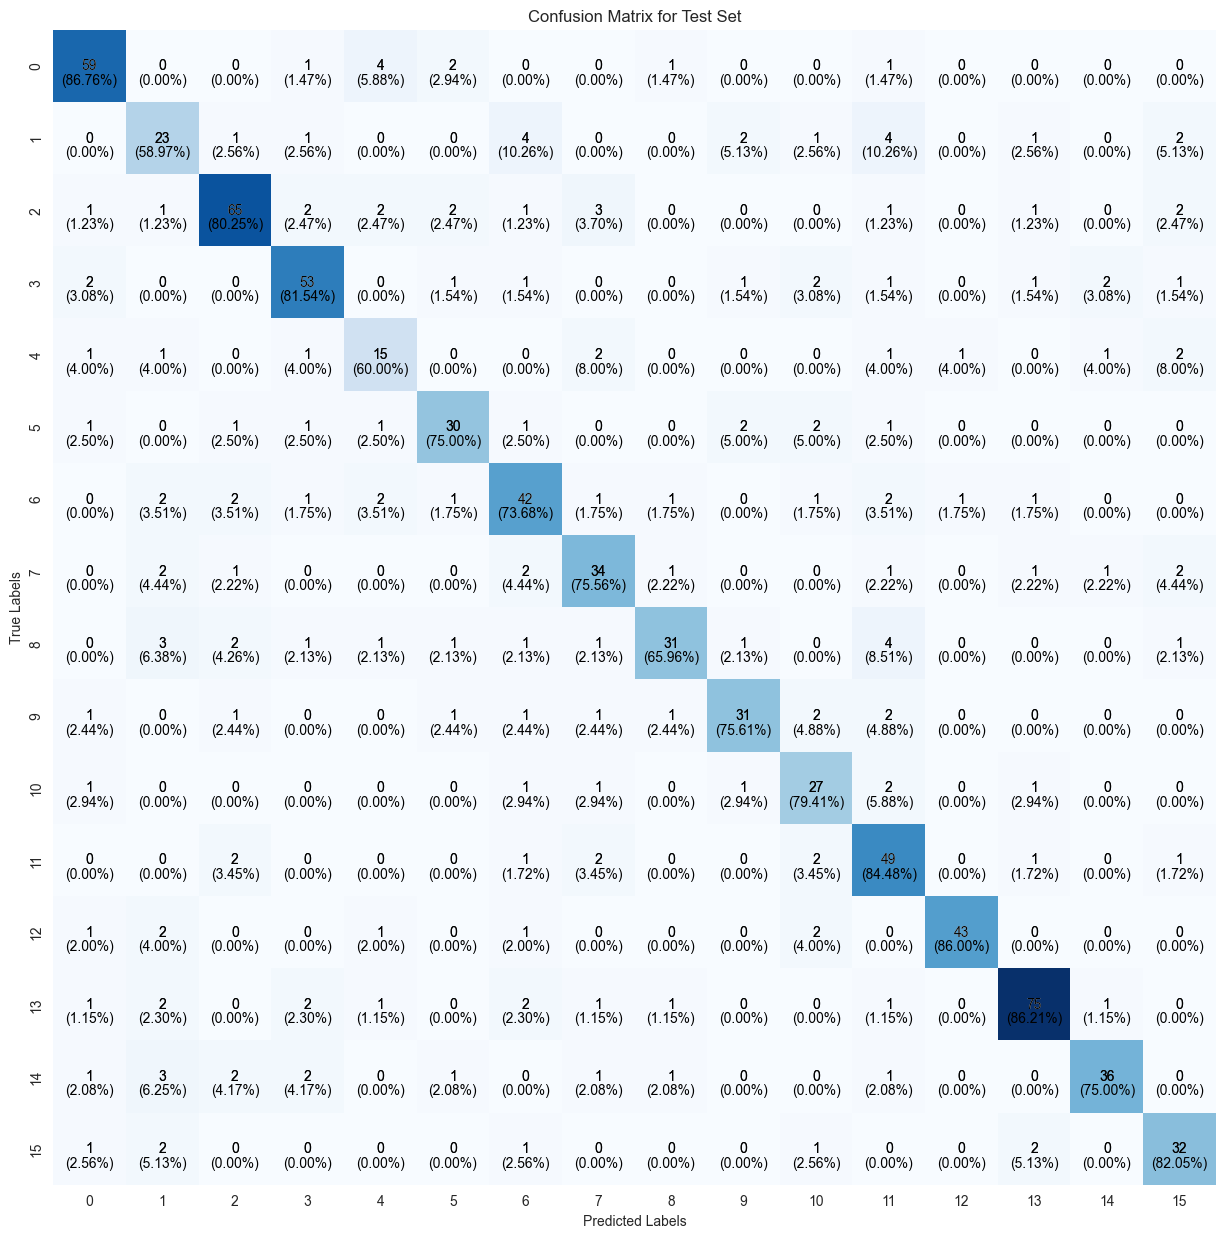

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        68
           1       0.56      0.59      0.57        39
           2       0.84      0.80      0.82        81
           3       0.82      0.82      0.82        65
           4       0.56      0.60      0.58        25
           5       0.77      0.75      0.76        40
           6       0.71      0.74      0.72        57
           7       0.72      0.76      0.74        45
           8       0.84      0.66      0.74        47
           9       0.82      0.76      0.78        41
          10       0.68      0.79      0.73        34
          11       0.69      0.84      0.76        58
          12       0.96      0.86      0.91        50
          13       0.89      0.86      0.88        87
          14       0.88      0.75      0.81        48
          15       0.74      0.82      0.78        39

    accuracy                           0.78       824
   macro avg       0.77   

In [30]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [31]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Self-transcendence    0.085204
Conversation          0.080657
soft_skill_score      0.079671
Openness              0.073360
Extraversion          0.071719
dtype: float64


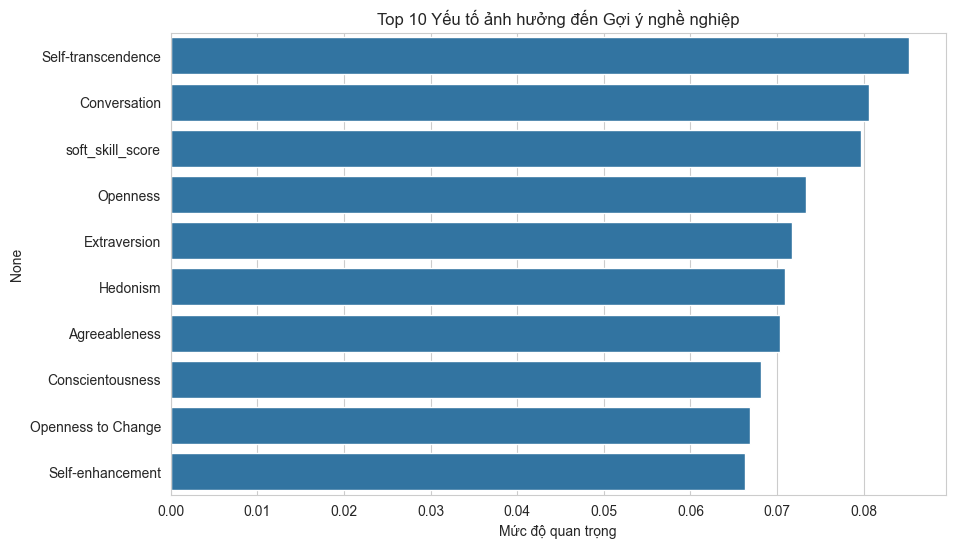

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()

In [33]:
joblib.dump(rf_model, '../../src/career_prediction_model.pkl')

['../../src/career_prediction_model.pkl']

In [34]:
joblib.dump(scaler, '../../src/scaler.pkl')

['../../src/scaler.pkl']

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [4]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [5]:
y = df['Role_encoded']

In [6]:
X

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,4.000000,4.000000,4.000000,4.000000,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746
1,5.000000,4.000000,4.000000,4.000000,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424
2,1.000000,4.000000,4.000000,4.000000,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024
3,0.000000,4.000000,4.000000,4.000000,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119
4,3.000000,4.000000,4.000000,4.000000,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.636043,0.137336,0.226302,0.056456,0.704709,0.480178,0.558140,0.238608,0.800011,0.780420,0.889618,0.230480,0.655361,0.149937
4112,0.192270,0.135045,0.644441,0.782071,0.879181,0.726732,0.715623,0.976057,0.972935,0.027870,0.402814,0.862264,0.628395,0.586368
4113,0.554620,0.724794,0.255892,0.122183,0.159705,0.963999,0.414078,0.097954,0.402532,0.959647,0.816209,0.398565,0.441053,0.072179
4114,0.465681,0.103231,0.229899,0.595242,0.621454,0.010347,0.574015,0.435590,0.852310,0.640508,0.716231,0.458104,0.368780,0.516576


In [7]:
y

0        6
1        6
2        6
3        6
4        6
        ..
4111    12
4112     7
4113    13
4114     8
4115     9
Name: Role_encoded, Length: 4116, dtype: int64

In [8]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
X_scaled

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,0.666667,0.666667,0.666667,0.666667,0.716175,0.480310,0.470353,0.039195,0.743468,0.085414,0.339526,0.089076,0.230310,0.208745
1,0.833333,0.666667,0.666667,0.666667,0.618465,0.452624,0.376950,0.089797,0.673265,0.069821,0.353436,0.102451,0.247233,0.196407
2,0.166667,0.666667,0.666667,0.666667,0.815976,0.461397,0.347072,0.138287,0.631317,0.093798,0.374896,0.133504,0.287078,0.268101
3,0.000000,0.666667,0.666667,0.666667,0.608710,0.521567,0.403155,0.114607,0.696058,0.121356,0.338648,0.159821,0.306398,0.258183
4,0.500000,0.666667,0.666667,0.666667,0.783087,0.319139,0.239546,0.050586,0.619972,0.063925,0.311630,0.145777,0.302811,0.207285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.106007,0.022889,0.037717,0.009409,0.706248,0.479924,0.557717,0.238450,0.801059,0.783033,0.889697,0.228789,0.655399,0.149860
4112,0.032045,0.022508,0.107407,0.130345,0.881302,0.726702,0.715383,0.976858,0.974430,0.026006,0.402602,0.862344,0.628417,0.586858
4113,0.092437,0.120799,0.042649,0.020364,0.159426,0.964184,0.413489,0.097614,0.402555,0.963327,0.816244,0.397345,0.440967,0.072001
4114,0.077613,0.017205,0.038317,0.099207,0.622716,0.009667,0.573611,0.435689,0.853493,0.642289,0.716207,0.457051,0.368651,0.516976


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [12]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 0.7839805825242718


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        68
           1       0.61      0.59      0.60        39
           2       0.83      0.80      0.82        81
           3       0.80      0.82      0.81        65
           4       0.75      0.60      0.67        25
           5       0.83      0.75      0.79        40
           6       0.75      0.77      0.76        57
           7       0.69      0.76      0.72        45
           8       0.91      0.66      0.77        47
           9       0.79      0.76      0.78        41
          10       0.61      0.79      0.69        34
          11       0.72      0.83      0.77        58
          12       0.88      0.86      0.87        50
          13       0.88      0.86      0.87        87
          14       0.82      0.75      0.78        48
          15       0.67      0.82      0.74        39

    accuracy                           0.78       824
   macro avg       0.78   

In [14]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [15]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Self-transcendence    0.093148
Conversation          0.090160
Extraversion          0.083702
Agreeableness         0.082910
Openness              0.081574
dtype: float64


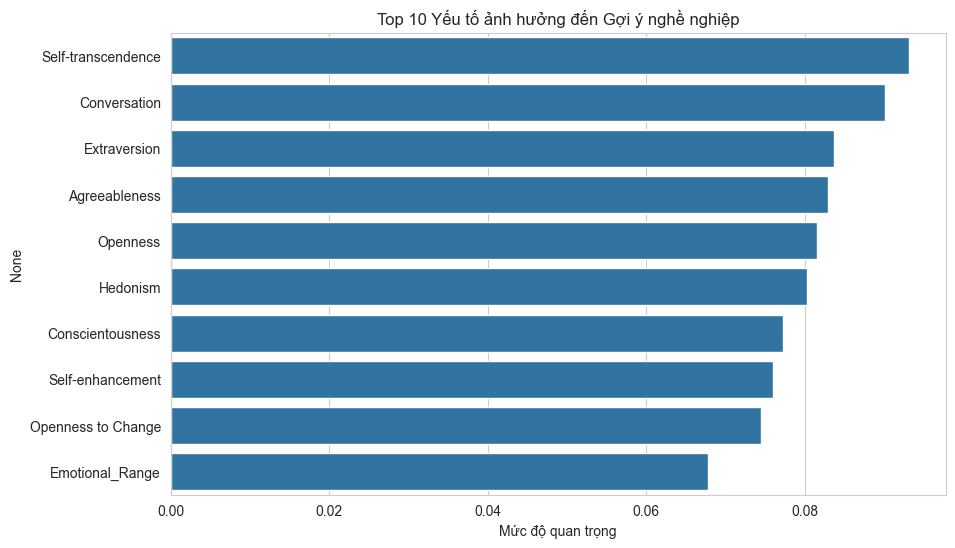

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()